In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Lettura dataset
data = pd.read_csv("train.csv", sep = ",")
data.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Y
0,39,K1,77516,R1,13,Q1,P1,M1,caucasian,Male,2174,0,40,USA,0
1,50,K2,83311,R1,13,Q2,P2,M2,caucasian,Male,0,0,13,USA,0
2,38,K3,215646,R2,9,Q3,P3,M1,caucasian,Male,0,0,40,USA,0
3,53,K3,234721,R3,7,Q2,P3,M2,black,Male,0,0,40,USA,0
4,28,K3,338409,R1,13,Q2,P4,M3,black,Female,0,0,40,Cuba,0


In [2]:
data.isna().sum()    # check
# Bisogna imputare i valori NaN

F0        0
F1     1836
F2        0
F3        0
F4        0
F5        0
F6     1843
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13     583
Y         0
dtype: int64

In [3]:
# Array con il nome delle colonne del DataFrame
colF = ['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']

# Colonne feature categoriche
colF1 = ['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8']
colF3 = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']
colF5 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']
colF6 = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14']
colF7 = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
colF8 = ['caucasian', 'black', 'asian', 'american', 'other']
colF9 = ['Male', 'Female']
colF13 = ['USA', 'Mexico', 'Philippines', 'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy', 'Dominican-Republic', 'Vietnam', 'Guatemala', 'Japan', 'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua', 'Peru', 'France', 'Greece', 'Ecuador', 'Ireland', 'Hong', 'Cambodia', 'Caribbean', 'Thailand', 'Laos', 'Yugoslavia', 'Honduras', 'Hungary', 'Scotland', 'Netherlands']

# Codifica delle feature categoriche
data.F1.replace(colF1, [1, 2, 3, 4, 5, 6, 7, 8], inplace = True)
data.F3.replace(colF3, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], inplace = True)
data.F5.replace(colF5, [1, 2, 3, 4, 5, 6, 7], inplace = True)
data.F6.replace(colF6, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace = True)
data.F7.replace(colF7, [1, 2, 3, 4, 5, 6], inplace = True)
data.F8.replace(colF8, [1, 2, 3, 4, 5], inplace = True)
data.F9.replace(colF9, [0, 1], inplace = True)
data.F13.replace(colF13, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], inplace = True)

In [4]:
# Preprocessing

# Suddivisione del target dal resto delle feature
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(x.shape)
print(y.shape)

# Creazione insiemi di train e test con un rapporto 75% - 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 258, stratify = y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(np.unique(y, return_counts=True)[1]/len(y))
print(np.unique(y_train, return_counts=True)[1]/len(y_train))
print(np.unique(y_test, return_counts=True)[1]/len(y_test))

(32561, 14)
(32561,)
(24420, 14)
(24420,)
(8141, 14)
(8141,)
[0.75919044 0.24080956]
[0.75917281 0.24082719]
[0.75924334 0.24075666]


In [5]:
np.argwhere(np.isnan(x_train))
np.argwhere(np.isnan(x_test))

array([[   9,    1],
       [   9,    6],
       [  12,    1],
       ...,
       [8125,   13],
       [8126,    1],
       [8126,    6]], dtype=int64)

In [6]:
# Imputazione dei valori NaN tramite SimpleImputer, con la strategia che sostituisce i valori mancanti con la moda dei valori della feature
print("SimpleImputer")
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
x_train_notnan = imp.fit_transform(x_train)
x_test_notnan = imp.transform(x_test)
print(x_train_notnan[pd.isna(x_train[:,0]),0][0:10])
print(x_test_notnan[pd.isna(x_test[:,0]),0][0:10])

SimpleImputer
[]
[]


In [7]:
np.argwhere(np.isnan(x_test_notnan))

array([], shape=(0, 2), dtype=int64)

In [8]:
# Creazione DataFrame da insiemi di train e test dopo l'imputazione dei valori mancanti 
df = pd.DataFrame(x_train_notnan, columns = colF)
dftest = pd.DataFrame(x_test_notnan, columns = colF)

In [9]:
df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,50.0,3.0,237868.0,4.0,14.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,50.0,1.0
1,41.0,5.0,195258.0,6.0,10.0,2.0,12.0,2.0,1.0,0.0,0.0,0.0,40.0,1.0
2,52.0,3.0,301229.0,8.0,11.0,5.0,6.0,5.0,1.0,1.0,0.0,0.0,40.0,1.0
3,28.0,3.0,173649.0,2.0,9.0,1.0,5.0,4.0,2.0,1.0,0.0,0.0,40.0,1.0
4,27.0,3.0,29904.0,1.0,13.0,1.0,11.0,1.0,1.0,1.0,0.0,0.0,40.0,1.0


In [10]:
dftest.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,49.0,3.0,187454.0,2.0,9.0,2.0,6.0,2.0,1.0,0.0,99999.0,0.0,65.0,1.0
1,33.0,3.0,243674.0,2.0,9.0,5.0,11.0,1.0,1.0,0.0,0.0,0.0,46.0,1.0
2,31.0,5.0,213307.0,2.0,9.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,40.0,1.0
3,49.0,3.0,34377.0,16.0,8.0,2.0,7.0,2.0,1.0,0.0,0.0,0.0,40.0,1.0
4,21.0,3.0,203003.0,13.0,6.0,2.0,7.0,2.0,1.0,0.0,0.0,0.0,40.0,1.0


In [11]:
# Codifica OneHot contemporaneamente su df e dftest
OneHotF1 = pd.get_dummies(df.F1)
OneHotTestF1 = pd.get_dummies(dftest.F1)
OneHotF3 = pd.get_dummies(df.F3)
OneHotTestF3 = pd.get_dummies(dftest.F3)
OneHotF5 = pd.get_dummies(df.F5)
OneHotTestF5 = pd.get_dummies(dftest.F5)
OneHotF6 = pd.get_dummies(df.F6)
OneHotTestF6 = pd.get_dummies(dftest.F6)
OneHotF7 = pd.get_dummies(df.F7)
OneHotTestF7 = pd.get_dummies(dftest.F7)
OneHotF8 = pd.get_dummies(df.F8)
OneHotTestF8 = pd.get_dummies(dftest.F8)
OneHotF9 = pd.get_dummies(df.F9)
OneHotTestF9 = pd.get_dummies(dftest.F9)
OneHotF13 = pd.get_dummies(df.F13)
OneHotTestF13 = pd.get_dummies(dftest.F13)

for i in range (1, len(colF1)):
    OneHotF1 = OneHotF1.rename(columns = {i: colF1[i-1]})
    OneHotTestF1 = OneHotTestF1.rename(columns = {i: colF1[i-1]})
for i in range (1, len(colF3)):
    OneHotF3 = OneHotF3.rename(columns = {i: colF3[i-1]})
    OneHotTestF3 = OneHotTestF3.rename(columns = {i: colF3[i-1]})
for i in range (1, len(colF5)):
    OneHotF5 = OneHotF5.rename(columns = {i: colF5[i-1]})
    OneHotTestF5 = OneHotTestF5.rename(columns = {i: colF5[i-1]})
for i in range (1, len(colF6)):
    OneHotF6 = OneHotF6.rename(columns = {i: colF6[i-1]})
    OneHotTestF6 = OneHotTestF6.rename(columns = {i: colF6[i-1]})
for i in range (1, len(colF7)):
    OneHotF7 = OneHotF7.rename(columns = {i: colF7[i-1]})
    OneHotTestF7 = OneHotTestF7.rename(columns = {i: colF7[i-1]})
for i in range (1, len(colF8)):
    OneHotF8 = OneHotF8.rename(columns = {i: colF8[i-1]})
    OneHotTestF8 = OneHotTestF8.rename(columns = {i: colF8[i-1]})
for i in range (1, len(colF9)):
    OneHotF9 = OneHotF9.rename(columns = {i: colF9[i-1]})
    OneHotTestF9 = OneHotTestF9.rename(columns = {i: colF9[i-1]})
for i in range (1, len(colF13)):
    OneHotF13 = OneHotF13.rename(columns = {i: colF13[i-1]})
    OneHotTestF13 = OneHotTestF13.rename(columns = {i: colF13[i-1]})

In [12]:
dftest.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,49.0,3.0,187454.0,2.0,9.0,2.0,6.0,2.0,1.0,0.0,99999.0,0.0,65.0,1.0
1,33.0,3.0,243674.0,2.0,9.0,5.0,11.0,1.0,1.0,0.0,0.0,0.0,46.0,1.0
2,31.0,5.0,213307.0,2.0,9.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,40.0,1.0
3,49.0,3.0,34377.0,16.0,8.0,2.0,7.0,2.0,1.0,0.0,0.0,0.0,40.0,1.0
4,21.0,3.0,203003.0,13.0,6.0,2.0,7.0,2.0,1.0,0.0,0.0,0.0,40.0,1.0


In [13]:
# Creazione newdf e newdftest con la sostituzione delle colonne generate con la codifica
newdf = pd.concat([df, OneHotF1, OneHotF3, OneHotF5, OneHotF6, OneHotF7, OneHotF8, OneHotF9, OneHotF13], axis = 1)
newdftest = pd.concat([dftest, OneHotTestF1, OneHotTestF3, OneHotTestF5, OneHotTestF6, OneHotTestF7, OneHotTestF8, OneHotTestF9, OneHotTestF13], axis = 1)

newdf = newdf.drop(["F1", "F3", "F5", "F6", "F7", "F8", "F9", "F13"], axis = 1)
newdftest = newdftest.drop(["F1", "F3", "F5", "F6", "F7", "F8", "F9", "F13"], axis = 1)

In [14]:
newdf.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,Hong,Cambodia,Caribbean,Thailand,Laos,Yugoslavia,Honduras,Hungary,Scotland,40.0
0,50.0,237868.0,14.0,0.0,0.0,50.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,41.0,195258.0,10.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,301229.0,11.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,28.0,173649.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,27.0,29904.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
newdftest.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,Ireland,Hong,Cambodia,Caribbean,Thailand,Laos,Yugoslavia,Honduras,Hungary,Scotland
0,49.0,187454.0,9.0,99999.0,0.0,65.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,33.0,243674.0,9.0,0.0,0.0,46.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,31.0,213307.0,9.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49.0,34377.0,8.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,203003.0,6.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


(array([  519.,  1677.,  1718., 13357.,  2323.,  2911.,  1321.,   336.,
          149.,   109.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

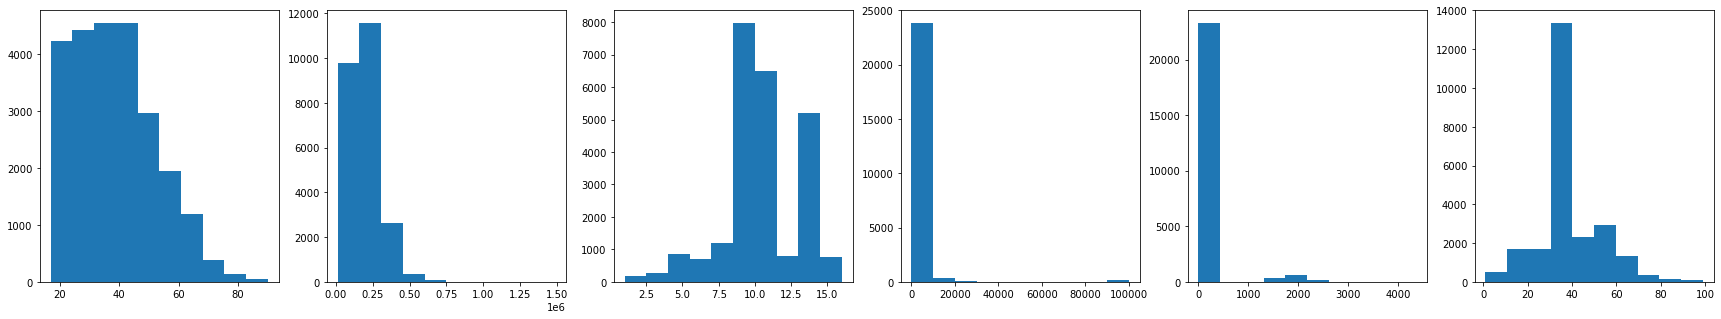

In [16]:
fig, axs = plt.subplots(1, 6, figsize = (30,5))
axs[0].hist(newdf.F0)
axs[1].hist(newdf.F2)
axs[2].hist(newdf.F4)
axs[3].hist(newdf.F10)
axs[4].hist(newdf.F11)
axs[5].hist(newdf.F12)

# L'unico outlier dovuto a un errore nel dataset è quello in F2

In [17]:
# Individuazione e rimozione degli outlier (in F2)
z_scores = stats.zscore(newdf["F2"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
newdf = newdf[filtered_entries]

newdf.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,Hong,Cambodia,Caribbean,Thailand,Laos,Yugoslavia,Honduras,Hungary,Scotland,40.0
0,50.0,237868.0,14.0,0.0,0.0,50.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,41.0,195258.0,10.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,301229.0,11.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,28.0,173649.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,27.0,29904.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

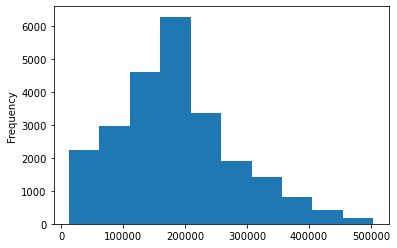

In [18]:
# Verifica rimozione outlier
newdf["F2"].plot.hist()

In [19]:
# Bilanciamento

array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

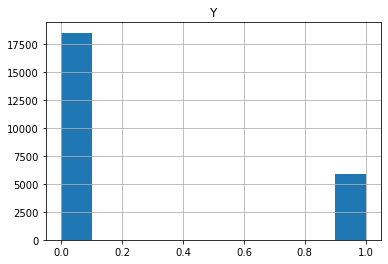

In [20]:
# Controllo bilanciamento y_train
ytraindf = pd.DataFrame(y_train, columns = ["Y"])
ytraindf.hist()

array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

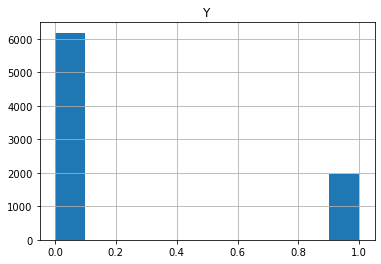

In [21]:
# Controllo bilanciamento y_test
ytestdf = pd.DataFrame(y_test, columns = ["Y"])
ytestdf.hist()

In [22]:
ytestdf.tail()

,Y
8136,0
8137,0
8138,1
8139,0
8140,0


In [23]:
# y_train e y_test sono sbilanciate
# SMOTE
smote = SMOTE(random_state = 0, sampling_strategy = 'not majority', k_neighbors = 5, n_jobs = -1)
x_train_notnan, y_train = smote.fit_resample(x_train_notnan, y_train)
print(x_train_notnan.shape, y_train.shape)
print(x_train_notnan)

smote = SMOTE(random_state = 0, sampling_strategy = 'not majority', k_neighbors = 5, n_jobs = -1)
x_test_notnan, y_test = smote.fit_resample(x_test_notnan, y_test)
print(x_test_notnan.shape, y_test.shape)
print(x_test_notnan)

(37078, 14) (37078,)
[[5.00000000e+01 3.00000000e+00 2.37868000e+05 ... 0.00000000e+00
  5.00000000e+01 1.00000000e+00]
 [4.10000000e+01 5.00000000e+00 1.95258000e+05 ... 0.00000000e+00
  4.00000000e+01 1.00000000e+00]
 [5.20000000e+01 3.00000000e+00 3.01229000e+05 ... 0.00000000e+00
  4.00000000e+01 1.00000000e+00]
 ...
 [4.88960665e+01 5.00000000e+00 2.98429449e+05 ... 1.98269036e+03
  5.98051247e+01 1.00000000e+00]
 [4.23555935e+01 4.51407914e+00 2.09067690e+05 ... 0.00000000e+00
  4.39259892e+01 1.00000000e+00]
 [4.11325156e+01 3.68875259e+00 1.06621989e+05 ... 0.00000000e+00
  4.15562370e+01 1.00000000e+00]]
(12362, 14) (12362,)
[[4.90000000e+01 3.00000000e+00 1.87454000e+05 ... 0.00000000e+00
  6.50000000e+01 1.00000000e+00]
 [3.30000000e+01 3.00000000e+00 2.43674000e+05 ... 0.00000000e+00
  4.60000000e+01 1.00000000e+00]
 [3.10000000e+01 5.00000000e+00 2.13307000e+05 ... 0.00000000e+00
  4.00000000e+01 1.00000000e+00]
 ...
 [3.89290448e+01 3.00000000e+00 1.73621593e+05 ... 0.000

array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

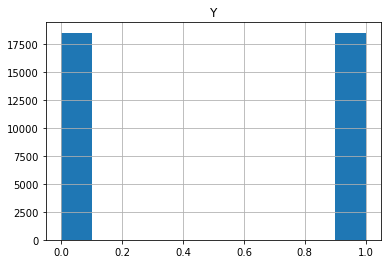

In [24]:
# Controllo bilanciamento y_train
ytraindf = pd.DataFrame(y_train, columns = ["Y"])
ytraindf.hist()

array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

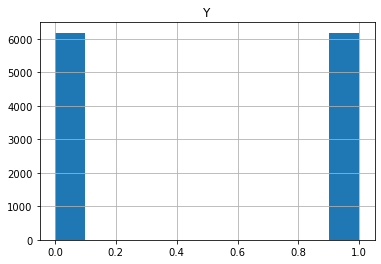

In [25]:
# Controllo bilanciamento y_test
ytestdf = pd.DataFrame(y_test, columns = ["Y"])
ytestdf.hist()

In [26]:
# Scaling con StandardScaler

print("StandardScaler")
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_notnan)
x_test_scaled = scaler.transform(x_test_notnan)

print("Media distribuzione di partenza: {}".format(np.mean(x_train_notnan, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_train_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_train_notnan, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_train_scaled, axis=0)))

print("Media distribuzione di partenza: {}".format(np.mean(x_test_notnan, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_test_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_test_notnan, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_test_scaled, axis=0)))

StandardScaler
Media distribuzione di partenza: [4.04148776e+01 3.15978768e+00 1.89276935e+05 4.34830668e+00
 1.05835625e+01 2.08033614e+00 5.04986852e+00 2.39857189e+00
 1.19907538e+00 2.69657182e-01 2.14631366e+03 1.20174242e+02
 4.21972649e+01 1.82859601e+00]
Media distribuzione scalata: [-9.15336747e-15 -3.15342205e-14 -7.11529654e-15  1.00613849e-14
 -4.96199147e-15 -3.35277891e-15  4.99182358e-15  1.40039672e-15
 -7.58191778e-15 -9.32692740e-15 -2.85073162e-14  2.39483892e-14
  1.70469941e-14 -9.63751317e-16]
Deviazione standard distribuzione di partenza: [1.24827787e+01 9.12695807e-01 1.03458110e+05 3.22599317e+00
 2.49316285e+00 1.06561051e+00 2.77281175e+00 1.23875466e+00
 5.68939509e-01 4.27829362e-01 1.09162077e+04 4.67192410e+02
 1.15795050e+01 3.66626989e+00]
Deviazione standard distribuzione scalata: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Media distribuzione di partenza: [4.06686511e+01 3.14888641e+00 1.88019553e+05 4.28871833e+00
 1.06441650e+01 2.09871839e+00 5.105

In [27]:
# # Scaling con Robust Scaler
# print("Robust Scaler")
# scaler = RobustScaler()
# x_train_scaled = scaler.fit_transform(x_train_notnan)
# x_test_scaled = scaler.transform(x_test_notnan)

# print("Media distribuzione di partenza: {}".format(np.mean(x_train_notnan, axis=0)))
# print("Media distribuzione scalata: {}".format(np.mean(x_train_scaled, axis=0)))

# print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_train_notnan, axis=0)))
# print("Deviazione standard distribuzione scalata: {}".format(np.std(x_train_scaled, axis=0)))

# print("Media distribuzione di partenza: {}".format(np.mean(x_test_notnan, axis=0)))
# print("Media distribuzione scalata: {}".format(np.mean(x_test_scaled, axis=0)))

# print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_test_notnan, axis=0)))
# print("Deviazione standard distribuzione scalata: {}".format(np.std(x_test_scaled, axis=0)))

In [34]:
classifierRF = RandomForestClassifier()

grid = dict()
grid['n_estimators'] = [10, 25, 100]
grid['criterion'] = ['gini', 'entropy']

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# define the grid search procedure
grid_search = GridSearchCV(estimator = classifierRF, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy')

# execute the grid search
grid_result = grid_search.fit(x_train_scaled, y_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_ , grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.901721 using {'criterion': 'entropy', 'n_estimators': 250}
0.901721 (0.004376) with: {'criterion': 'entropy', 'n_estimators': 250}
